In [1]:
# Import packages

%matplotlib inline

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
from scipy.stats import norm
from operator import itemgetter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Import  datasets

# Change path for different computer

KTraining_path = r'C:\Users\Jeremy\Desktop\K_Aggregate.csv'
projK_path = r'C:\Users\Jeremy\Desktop\K_Projected.csv'
K2018_path = r'C:\Users\Jeremy\Desktop\K2018.csv'
dfTrainingK = pd.read_csv(KTraining_path)
dfK = pd.read_csv(K2018_path)
dfProjectedK = pd.read_csv(projK_path)
dfTrainingK.columns

Index(['Name', 'G', 'XPM', 'XPA', 'XP%', 'FGM', 'FGA', 'FG%', '0-29', '30-39',
       '40-49', '50+', 'Team PPG', 'FantPt', 'Pts/G'],
      dtype='object')

In [3]:
dfTrainingK.head()

,Name,G,XPM,XPA,XP%,FGM,FGA,FG%,0-29,30-39,40-49,50+,Team PPG,FantPt,Pts/G
0,Stephen Gostkowski,16,51,51,100.0,35,37,94.6,11,10,12,1,29.2,156,9.8
1,Cody Parkey,16,54,54,100.0,32,36,88.9,10,14,4,4,29.6,150,9.4
2,Adam Vinatieri,16,50,50,100.0,30,31,96.8,10,10,7,3,28.6,140,8.8
3,Mason Crosby,16,53,55,96.4,27,33,81.8,7,11,5,4,30.4,136,8.5
4,Stephen Hauschka,16,41,41,100.0,31,37,83.8,10,10,9,2,24.6,134,8.4


In [4]:
dfK.columns

Index(['Name', 'AVG XPM', 'AVG XPA', 'AVG XP%', 'AVG FGM', 'AVG FGA',
       'AVG FG%', 'AVG 0-29', 'AVG 30-39', 'AVG 40-49', 'AVG 50+', 'PPG'],
      dtype='object')

In [5]:
dfK.head()

,Name,AVG XPM,AVG XPA,AVG XP%,AVG FGM,AVG FGA,AVG FG%,AVG 0-29,AVG 30-39,AVG 40-49,AVG 50+,PPG
0,Stephen Gostkowski,51,52,98.7,30,34,88.2,10,10,8,2,27.6
1,Greg Zuerlein,34,35,97.1,27,33,81.8,7,9,6,5,34.9
2,Justin Tucker,35,35,100.0,34,37,91.9,8,10,10,6,24.8
3,Wil Lutz,51,53,96.2,30,34,88.2,8,8,10,4,34.9
4,Matt Bryant,37,38,97.4,27,31,87.1,8,8,8,3,24.7


In [6]:
# Train and test set construction

train, test = train_test_split(dfTrainingK, test_size=0.2, random_state=52)
 
xtrain = train[['XPM', 'XPA', 'XP%', 'FGM', 'FGA', 'FG%', '0-29', '30-39',
       '40-49', '50+', 'Team PPG']]
ytrain = train[['FantPt']]
 
xtest = test[['XPM', 'XPA', 'XP%', 'FGM', 'FGA', 'FG%', '0-29', '30-39',
       '40-49', '50+', 'Team PPG']]
ytest = test[['FantPt']]

In [7]:
#Linear Regression 

linReg = linear_model.LinearRegression()
linReg.fit(xtrain, ytrain)

y_predLin = linReg.predict(xtest)

print(y_predLin - ytest)

print('Coefficients: \n', linReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predLin))
print('Variance score: %.3f' % r2_score(ytest, y_predLin))

      FantPt
2   0.017137
8   0.012393
19  0.002410
66  0.028400
52  0.004972
4   0.041579
29  0.017892
80  0.013485
51 -0.014609
65  0.019815
48  0.012766
73  0.023631
62 -0.028927
83 -0.020277
78  0.048859
49  0.003802
44 -0.003047
84  0.014011
Coefficients: 
 [[-6.36409979e-03  1.00611190e+00  3.91138100e-03  2.98781950e+00
   1.75792043e-03 -4.20878675e-05  1.48446368e-02  1.30732545e-02
   1.05070265e-02  8.41803037e-03 -2.66565808e-03]]
Mean squared error: 0.000
Variance score: 1.000


In [8]:
# Ridge Regression

ridgeReg = linear_model.Ridge(alpha = 1000)

ridgeReg.fit(xtrain, ytrain)

y_predRidge = ridgeReg.predict(xtest)

print(y_predRidge - ytest)

print('Coefficients: \n', ridgeReg.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_predRidge))
print('Variance score: %.3f' % r2_score(ytest, y_predRidge))

       FantPt
2    0.019496
8   -0.874453
19  -1.809966
66  -3.225957
52  -1.074415
4   -0.997050
29   1.259890
80   2.283474
51   0.148722
65  -5.761438
48  -2.296149
73  -0.440903
62  11.093317
83   6.604244
78   0.883395
49  -0.833097
44  -0.086121
84   2.524095
Coefficients: 
 [[ 0.44406307  0.48913204 -0.07110881  1.05581672  1.09676955  0.43639376
   0.26819881  0.31562594  0.26364552  0.20439927  0.22599938]]
Mean squared error: 13.145
Variance score: 0.980


In [9]:
# Bayesian Ridge Regression

bayesianRidge = linear_model.BayesianRidge()

bayesianRidge.fit(xtrain, ytrain)

y_pred_bayesianRidge = bayesianRidge.predict(xtest)

print('Coefficients: \n', bayesianRidge.coef_)
print("Mean squared error: %.3f" % mean_squared_error(ytest, y_pred_bayesianRidge))
print('Variance score: %.3f' % r2_score(ytest, y_pred_bayesianRidge))

Coefficients: 
 [-3.00554258e-03  1.00261057e+00  2.86217074e-03  2.97820399e+00
  6.07041963e-03  1.45397056e-03  1.91492429e-02  1.74688519e-02
  1.48239782e-02  1.30783710e-02 -1.90339855e-03]
Mean squared error: 0.000
Variance score: 1.000


c:\users\jeremy\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# Support Vector Regression 

svr_rbf = SVR(kernel='rbf', gamma=1e-3, C=200, epsilon=0.1)
svr_rbf.fit(xtrain, ytrain.values.ravel())

y_supp = svr_rbf.predict(xtest)

print(y_supp - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_supp))
print('Variance score: %.3f' % r2_score(ytest, y_supp))

2      0.063896
8     -0.606331
19     0.817969
66     1.276734
52    -0.407451
4      0.065261
29    -0.367846
80    -0.893758
51    -0.232301
65    -0.214769
48     0.876446
73    -1.799359
62    18.270563
83     1.882232
78    -0.206372
49     0.062577
44     0.923328
84    -0.954227
Name: FantPt, dtype: float64
Mean squared error: 19.280
Variance score: 0.971


In [11]:
# Random Forest Regression 

randomForest = RandomForestRegressor(n_estimators = 100, max_depth = 50)
randomForest.fit(xtrain, ytrain.values.ravel())

y_rand = randomForest.predict(xtest)
print(y_rand - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_rand))
print('Variance score: %.3f' % r2_score(ytest, y_rand))

2     -6.34
8     -2.09
19    -2.38
66    -4.52
52     6.30
4      0.35
29     2.61
80    -1.38
51     2.52
65   -10.30
48     6.10
73    -4.99
62    12.27
83     3.42
78     1.56
49    -2.62
44    -4.18
84   -11.78
Name: FantPt, dtype: float64
Mean squared error: 34.529
Variance score: 0.948


In [12]:
# Gradient Boosting Regression

gradBoost = GradientBoostingRegressor()
gradBoost.fit(xtrain, ytrain.values.ravel())

y_grad = gradBoost.predict(xtest)
print(y_grad - ytest['FantPt'])

print("Mean squared error: %.3f" % mean_squared_error(ytest, y_grad))
print('Variance score: %.3f' % r2_score(ytest, y_grad))

2     -3.517762
8      1.054745
19    -0.773794
66    -2.703743
52     5.463897
4     -0.396319
29     1.914754
80    -3.698362
51     3.708070
65    -7.151422
48     4.987969
73    -0.915717
62    11.857806
83     0.900319
78    -4.029078
49     3.298475
44     0.820498
84    -7.032880
Name: FantPt, dtype: float64
Mean squared error: 21.002
Variance score: 0.969


Wingspan and DWS: slope = 3.791643878545457 , intercept = 27.453050270723537 , r_value = 0.6283291976994425 , p_value = 4.347446215315131e-11 , std_err = 0.5033047169033419


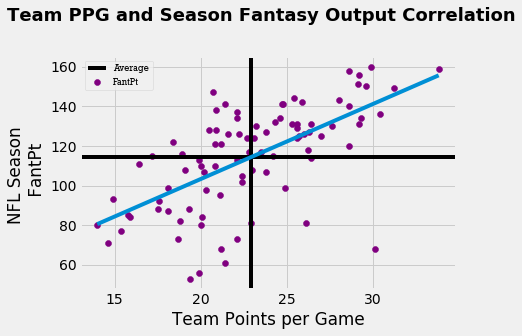

In [13]:
# Scatter plot of correlation between offense PPG and seasonal fantasy points

plt.style.use('fivethirtyeight')
 
kickerppg, ax = plt.subplots()

ax.scatter(dfTrainingK['Team PPG'], dfTrainingK['FantPt'], color = 'purple')
ax.axvline(x = np.mean(dfTrainingK['Team PPG']), color = 'black')
ax.axhline(y = np.mean(dfTrainingK['FantPt']), label = "Average", color = 'black')
kickerppg.suptitle("Team PPG and Season Fantasy Output Correlation", weight = 'bold', size = 18, y = 1.05)
ax.set_xlabel("Team Points per Game")
ax.set_ylabel("NFL Season \n FantPt")
 
ax.plot(np.unique(dfTrainingK['Team PPG']), np.poly1d(np.polyfit(dfTrainingK['Team PPG'], dfTrainingK['FantPt'], 1))(np.unique(dfTrainingK['Team PPG'])))

ax.legend(loc='best', prop={'size': 9, "family": "Rockwell"})
 
slope, intercept, r_value, p_value, std_err = linregress(dfTrainingK['Team PPG'], dfTrainingK['FantPt'])
print("Wingspan and DWS: slope =", slope, ", intercept =", intercept, ", r_value =", r_value,
    ", p_value =", p_value, ", std_err =", std_err)
rsquared = r_value ** 2
rpString = "r = " + str(round(r_value, 3)) + ", p = " + str(round(p_value, 3)) + ", rsquared = " + str(round(rsquared, 3))

kickerppg.savefig('ppg-fantpt-K.png', dpi = 400, bbox_inches = 'tight')

In [14]:
# Linear Regression Predictions

kickers = dfK.loc[:, 'AVG XPM': 'PPG']
linear_preds = []
rows = 0
cols = 0
temp = linReg.predict(kickers)
names = dfK.iloc[:, 0]

print("2018 NFL seasonal fantasy points prediction for K using Linear Regression: ")
for i in(names):
    linear_preds.append([i, temp[rows][cols]])
    print(i, temp[rows][cols])  
    rows+=1

2018 NFL seasonal fantasy points prediction for K using Linear Regression: 
Stephen Gostkowski 142.02830193392398
Greg Zuerlein 115.98855765236466
Justin Tucker 137.02016683292354
Wil Lutz 142.98719040729245
Matt Bryant 119.0183746436315
Harrison Butker 161.00096358717568
Jake Elliott 132.02109166995567
Chris Boswell 125.99295601811436
Robbie Gould 117.02565519068153
Matt Prater 118.01575127783522
Mason Crosby 122.02909853148392
Adam Vinatieri 117.01942750370026
Graham Gano 119.02260315150109
Brandon McManus 105.01489327443831
Ryan Succop 102.02419803045387
Jason Myers 118.00836271213296
Ka'imi Fairbairn 94.98790215215857
Brett Maher 123.020190365201
Aldrick Rosas 76.9894578392498
Cody Parkey 113.01231966935914
Sebastian Janikowski 109.01383917766255
Dustin Hopkins 124.0545939450857
Josh Lambo 109.02508540789238


In [15]:
# Ridge Regression predictions

rows = 0
cols = 0
ridge_preds = []
temp = ridgeReg.predict(kickers)

print("2018 NFL seasonal fantasy points prediction for K using Ridge Regression: ")
for i in(names):
    ridge_preds.append([i, temp[rows][cols]])
    print(i, temp[rows][cols])  
    rows+=1

2018 NFL seasonal fantasy points prediction for K using Ridge Regression: 
Stephen Gostkowski 140.90483414062277
Greg Zuerlein 118.71263146458926
Justin Tucker 134.69606354846567
Wil Lutz 142.9899737119166
Matt Bryant 119.37610368530193
Harrison Butker 158.96450016607267
Jake Elliott 129.5896686580128
Chris Boswell 126.04902775944274
Robbie Gould 116.78036453639731
Matt Prater 117.50145629592544
Mason Crosby 122.035053597016
Adam Vinatieri 118.45420147746125
Graham Gano 119.45160175978725
Brandon McManus 106.20338993051547
Ryan Succop 102.85516692056906
Jason Myers 116.27778978386644
Ka'imi Fairbairn 97.19962989190293
Brett Maher 121.47683730027032
Aldrick Rosas 79.67575789309927
Cody Parkey 114.75129584828554
Sebastian Janikowski 110.43204175529917
Dustin Hopkins 122.02701743041749
Josh Lambo 108.53903015735949


In [16]:
# Bayesian Ridge Regression predictions 

rows = 0
cols = 0
bayes_preds = []
temp = bayesianRidge.predict(kickers)

print("2018 NFL seasonal fantasy points prediction for K using Bayesian Ridge Regression: ")
for i in(names):
    bayes_preds.append([i, temp[rows]])
    print(i, temp[rows])  
    rows+=1

2018 NFL seasonal fantasy points prediction for K using Bayesian Ridge Regression: 
Stephen Gostkowski 142.0281953206319
Greg Zuerlein 116.00111837282114
Justin Tucker 137.02102452089719
Wil Lutz 142.9923241622074
Matt Bryant 119.02094357841128
Harrison Butker 161.00476450665502
Jake Elliott 132.0190707842217
Chris Boswell 125.99572051065412
Robbie Gould 117.02614259546102
Matt Prater 118.01631484550397
Mason Crosby 122.02996868032855
Adam Vinatieri 117.02448148561865
Graham Gano 119.02598194176161
Brandon McManus 105.01750779474092
Ryan Succop 102.02444900196701
Jason Myers 118.0069857562898
Ka'imi Fairbairn 94.99120843022249
Brett Maher 123.01992861564445
Aldrick Rosas 76.99635290008027
Cody Parkey 113.01755128322532
Sebastian Janikowski 109.01915500610247
Dustin Hopkins 124.04921762246487
Josh Lambo 109.02418384268509


In [17]:
# Support Vector Regression predictions 

rows = 0
svr_preds = []
temp = svr_rbf.predict(kickers)

print("2018 NFL seasonal fantasy points prediction for K using Support Vector Regression: ")
for i in(names):
    svr_preds.append([i, temp[rows]])
    print(i, temp[rows])  
    rows+=1

2018 NFL seasonal fantasy points prediction for K using Support Vector Regression: 
Stephen Gostkowski 143.58758320268788
Greg Zuerlein 115.70594371829668
Justin Tucker 137.6732114695251
Wil Lutz 145.74720152853934
Matt Bryant 119.02315257706469
Harrison Butker 161.77647650624354
Jake Elliott 131.53306324261746
Chris Boswell 126.22622381444233
Robbie Gould 117.07078860216947
Matt Prater 117.83095017768153
Mason Crosby 121.29836925901334
Adam Vinatieri 116.71100530806254
Graham Gano 119.04595763152356
Brandon McManus 105.12407742562456
Ryan Succop 101.78903910034047
Jason Myers 117.95895105554101
Ka'imi Fairbairn 95.29937097637716
Brett Maher 123.57198928907802
Aldrick Rosas 79.12893840447236
Cody Parkey 112.82831406061422
Sebastian Janikowski 108.82758943961318
Dustin Hopkins 123.89321081374905
Josh Lambo 107.87546685045234


In [18]:
# Random Forest Regression predictions 

rows = 0
rf_preds = []
temp = randomForest.predict(kickers)

print("2018 NFL seasonal fantasy points prediction for K using Random Forest Regression: ")
for i in(names):
    rf_preds.append([i, temp[rows]])
    print(i, temp[rows])  
    rows+=1

2018 NFL seasonal fantasy points prediction for K using Random Forest Regression: 
Stephen Gostkowski 132.02
Greg Zuerlein 121.31
Justin Tucker 138.99
Wil Lutz 134.57
Matt Bryant 120.34
Harrison Butker 153.97
Jake Elliott 130.61
Chris Boswell 124.7
Robbie Gould 118.74
Matt Prater 118.64
Mason Crosby 123.55
Adam Vinatieri 119.67
Graham Gano 119.4
Brandon McManus 105.54
Ryan Succop 102.13
Jason Myers 114.88
Ka'imi Fairbairn 91.95
Brett Maher 117.72
Aldrick Rosas 80.49
Cody Parkey 116.51
Sebastian Janikowski 113.51
Dustin Hopkins 118.67
Josh Lambo 114.11


In [19]:
# Gradient Boosting Regression predictions 

rows = 0
gb_preds = []
temp = gradBoost.predict(kickers)

print("2018 NFL season fantasy points scored prediction for K using Gradient Boosting Regression:")
for i in(names):
    gb_preds.append([i, temp[rows]])
    print(i, temp[rows])  
    rows+=1

2018 NFL season fantasy points scored prediction for K using Gradient Boosting Regression:
Stephen Gostkowski 134.58397419257787
Greg Zuerlein 124.07775030090272
Justin Tucker 139.66083330253713
Wil Lutz 137.00573292765992
Matt Bryant 121.42042189718313
Harrison Butker 157.45778387424173
Jake Elliott 130.69351668625194
Chris Boswell 125.2860953075645
Robbie Gould 120.79562447653998
Matt Prater 117.73492326986973
Mason Crosby 123.95605580312746
Adam Vinatieri 117.93833897067931
Graham Gano 121.06576298401333
Brandon McManus 107.30046780213223
Ryan Succop 99.82910918000537
Jason Myers 117.26092144215734
Ka'imi Fairbairn 95.01728096926804
Brett Maher 122.08865470964557
Aldrick Rosas 77.12076554750753
Cody Parkey 116.26583567957675
Sebastian Janikowski 114.427691758143
Dustin Hopkins 120.64256736369468
Josh Lambo 111.99358223628384


In [20]:
#Convert to dataframes 

dflinear = pd.DataFrame(linear_preds, columns = ['Name', 'FantPtLinear'])
dfridge = pd.DataFrame(ridge_preds, columns = ['Name', 'FantPtRidge'])
dfbayes = pd.DataFrame(bayes_preds, columns = ['Name', 'FantPtBayes'])
dfsvr =  pd.DataFrame(svr_preds, columns = ['Name', 'FantPtSVR'])
dfrand = pd.DataFrame(rf_preds, columns = ['Name', 'FantPtRF'])
dfgrad = pd.DataFrame(gb_preds, columns = ['Name', 'FantPtGB'])

In [21]:
# Merge with actual data for validation

dflinear = dflinear.merge(dfProjectedK)
dfridge = dfridge.merge(dfProjectedK)
dfbayes = dfbayes.merge(dfProjectedK)
dfrand = dfrand.merge(dfProjectedK)
dfgrad = dfgrad.merge(dfProjectedK)
dfsvr = dfsvr.merge(dfProjectedK)
dflinear.head()

,Name,FantPtLinear,ESPN,Projected
0,Stephen Gostkowski,142.028302,146,148
1,Greg Zuerlein,115.988558,148,131
2,Justin Tucker,137.020167,138,154
3,Wil Lutz,142.987190,131,165
4,Matt Bryant,119.018375,140,105


In [22]:
# RMSE and MSE validation for ESPN's Predictions

mse = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.ESPN
    temp = temp * temp
    mse += temp
mse = mse/dflinear.shape[0]
rmse = math.sqrt(mse)

print("ESPN Mean Squared Error: " + str(mse))
print("ESPN Root Mean Squared Error: " + str(rmse))

ESPN Mean Squared Error: 733.8695652173913
ESPN Root Mean Squared Error: 27.09002704349686


In [23]:
# RMSE and MSE validation for Linear Regression predictions

mselinear = 0
for row in dflinear.itertuples():
    temp = row.Projected-row.FantPtLinear
    temp = temp * temp
    mselinear += temp
mselinear = mselinear/dflinear.shape[0]
rmselinear = math.sqrt(mselinear)

print("Linear Regression Mean Squared Error: " + str(mselinear))
print("Linear Regression Root Mean Squared Error: " + str(rmselinear))

Linear Regression Mean Squared Error: 792.1533714608901
Linear Regression Root Mean Squared Error: 28.14521933581066


In [24]:
# RMSE and MSE validation for Ridge Regression predictions

mseridge = 0
for row in dfridge.itertuples():
    temp = row.Projected-row.FantPtRidge
    temp = temp * temp
    mseridge += temp
mseridge = mseridge/dfridge.shape[0]
rmseridge = math.sqrt(mseridge)

print("Ridge Regression Mean Squared Error: " + str(mseridge))
print("Ridge Regression Root Mean Squared Error: " + str(rmseridge))

Ridge Regression Mean Squared Error: 763.3286677250499
Ridge Regression Root Mean Squared Error: 27.628403278601713


In [25]:
# RMSE and MSE validation for Bayesian Ridge Regression predictions

msebayes = 0
for row in dfbayes.itertuples():
    temp = row.Projected-row.FantPtBayes
    temp = temp * temp
    msebayes += temp
msebayes = msebayes/dfbayes.shape[0]
rmsebayes = math.sqrt(msebayes)

print("Bayesian Ridge Regression Mean Squared Error: " + str(msebayes))
print("Bayesian Ridge Regression Root Mean Squared Error: " + str(rmsebayes))

Bayesian Ridge Regression Mean Squared Error: 792.0545071254298
Bayesian Ridge Regression Root Mean Squared Error: 28.14346295546143


In [26]:
# RMSE and MSE validation for Support Vector Regression predictions

msesvr = 0
for row in dfsvr.itertuples():
    temp = row.Projected-row.FantPtSVR
    temp = temp * temp
    msesvr += temp
msesvr = msesvr/dfsvr.shape[0]
rmsesvr = math.sqrt(msesvr)

print("Support Vector Regression Mean Squared Error: " + str(msesvr))
print("Support Vector Regression Root Mean Squared Error: " + str(rmsesvr))

Support Vector Regression Mean Squared Error: 772.7348853726468
Support Vector Regression Root Mean Squared Error: 27.798109384860094


In [27]:
# RMSE and MSE validation for Random Forest Regression predictions

mserf = 0
for row in dfrand.itertuples():
    temp = row.Projected-row.FantPtRF
    temp = temp * temp
    mserf += temp
mserf = mserf/dfrand.shape[0]
rmserf = math.sqrt(mserf)

print("Random Forest Regression Mean Squared Error: " + str(mserf))
print("Random Forest Regression Root Mean Squared Error: " + str(rmserf))

Random Forest Regression Mean Squared Error: 812.8536434782609
Random Forest Regression Root Mean Squared Error: 28.51058826959312


In [28]:
# RMSE and MSE validation for Gradient Boosting Regression predictions

msegb = 0
for row in dfgrad.itertuples():
    temp = row.Projected-row.FantPtGB
    temp = temp * temp
    msegb += temp
msegb = msegb/dfgrad.shape[0]
rmsegb = math.sqrt(msegb)

print("Gradient Boosting Regression Mean Squared Error: " + str(msegb))
print("Gradient Boosting Regression Root Mean Squared Error: " + str(rmsegb))

Gradient Boosting Regression Mean Squared Error: 786.0542000031365
Gradient Boosting Regression Root Mean Squared Error: 28.03665814613319


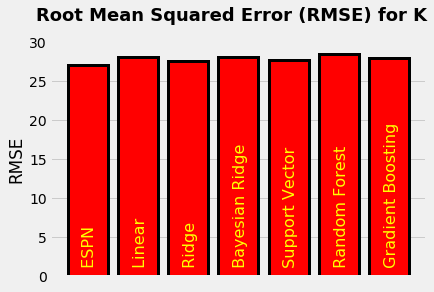

In [29]:
# Root Mean Squared Error Graph

rmsePlot, ax = plt.subplots()

rmseScores = [rmse, rmselinear, rmseridge, rmsebayes, rmsesvr, rmserf, rmsegb]
x_pos = np.arange(len(rmseScores))

ax.bar(x_pos, rmseScores, edgecolor = 'black', color = 'red', linewidth = 3)

rmseNames = [" ESPN", " Linear", " Ridge", " Bayesian Ridge", " Support Vector", " Random Forest", " Gradient Boosting"]

labels = [i for i in rmseNames]

rects = ax.patches
for rect, label in zip(rects, labels):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.8, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'yellow', size = 16)

rmsePlot.suptitle("Root Mean Squared Error (RMSE) for K", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("RMSE")

rmsePlot.savefig('rmseK-plot.png', dpi = 400, bbox_inches = 'tight')

Average Seasonal Fantasy Points for all Kickers:
[['Harrison Butker', 159.02908144006477], ['Wil Lutz', 141.04873712293593], ['Stephen Gostkowski', 139.19214813174074], ['Justin Tucker', 137.51021661239145], ['Jake Elliott', 131.07773517350992], ['Chris Boswell', 125.70833723503635], ['Mason Crosby', 122.48309097849489], ['Dustin Hopkins', 122.22276786256862], ['Brett Maher', 121.81626671330656], ['Matt Bryant', 119.69983273026543], ['Graham Gano', 119.5019845780978], ['Greg Zuerlein', 118.6326669181624], ['Matt Prater', 117.95656597780264], ['Robbie Gould', 117.90642923354154], ['Adam Vinatieri', 117.80290912425367], ['Jason Myers', 117.06550179166459], ['Cody Parkey', 114.3975527568435], ['Sebastian Janikowski', 110.87171952280339], ['Josh Lambo', 110.09455808244553], ['Brandon McManus', 105.7000560379086], ['Ryan Succop', 101.7753270388893], ["Ka'imi Fairbairn", 94.90756540332153], ['Aldrick Rosas', 78.40021209740154]]


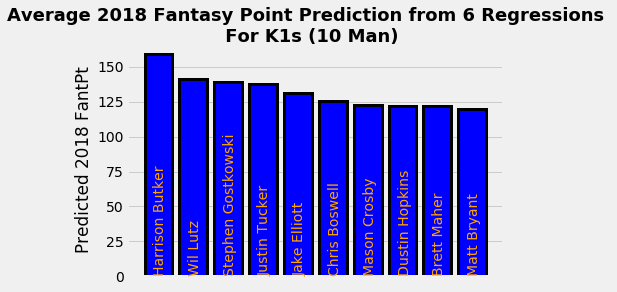

In [30]:
# Average Predictions plot for K1 (K#1 - K #10) since predictions are similar in accuracy

avgPredictions, ax = plt.subplots()

averagePred = []
name = 0

for h, i ,j ,k , l, m, in zip(linear_preds, ridge_preds, bayes_preds, svr_preds, rf_preds, gb_preds):
    averagePred.append([linear_preds[name][0], (linear_preds[name][1] + ridge_preds[name][1] + bayes_preds[name][1] + svr_preds[name][1] + rf_preds[name][1] + gb_preds[name][1]) / 6])
    name += 1

sortedAvg = sorted(averagePred, key = itemgetter(1), reverse = True)
K1Avg = []
K1Avg = sortedAvg[0:10]
print("Average Seasonal Fantasy Points for all Kickers:")
print(sortedAvg)

sortedAvgData = [row[1] for row in K1Avg]
x_pos = np.arange(len(sortedAvgData))

ax.bar(x_pos, sortedAvgData, color = 'blue', edgecolor = 'black', linewidth = 3)

labels = [row[0] for row in sortedAvg]
labelsK1 = labels[0:10]

rects = ax.patches
for rect, label in zip(rects, labelsK1):
    height = .5
    ax.text(rect.get_x() + rect.get_width() / 1.75, height, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'Orange')

avgPredictions.suptitle("Average 2018 Fantasy Point Prediction from 6 Regressions \n For K1s (10 Man)", weight = 'bold', size = 18, y = 1.005)
ax.xaxis.set_visible(False)
ax.set_ylabel("Predicted 2018 FantPt")

avgPredictions.savefig('avg-predictionsK.png', dpi = 400, bbox_inches = 'tight')